In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)

In [3]:
savefilesto = '/Volumes/SAF_Data/Colloquium22/'

In [7]:
csvname = 'sorted-again-covabr.xlsx'
combinednm = 'agubh2-10km-allpkgdata.xlsx'
modelrun = '0hfld-agubh2_10km/'

mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/Sp2022/2ndTake/{csvname}'
# savefilesto = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Plots/barpkgs/'

# megamerge = pd.read_excel(f'{mypath}', sheet_name = 'alldata')#, usecols = 'B:')#

Codes: 
coA-brC = LA
coA-brA = SM
coBC-brBCA = DEF

In [9]:

LA = pd.read_excel(mypath, sheet_name = 'coA-brC')#, usecols =' A:AB', nrows = 40)
SM = pd.read_excel(mypath, sheet_name = 'coA-brA')#, usecols =' A:AB', nrows = 22)
DEF = pd.read_excel(mypath, sheet_name = 'coBC-brBCA')#, usecols =' A:AB', nrows = 46)

# allbars = pd.read_excel(f'{mypath}', sheet_name = 'agubh2-10km-allpkgdata', usecols = 'A:S', nrows=106)
#allbars = allbars.iloc[:, 1:19]

Text(0, 0.5, 'depth')

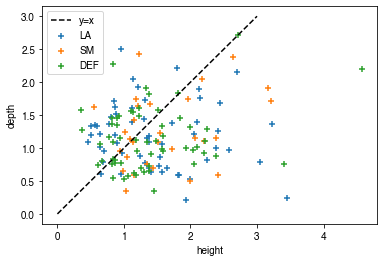

In [11]:
# plt.scatter(LA['MaxClinoHt'], LA['MaxFlowDepth'], label = 'LA', marker= 'o')
# plt.scatter(SM['MaxClinoHt'], SM['MaxFlowDepth'], label = 'SM', marker='o')
# plt.scatter(DEF['MaxClinoHt'], DEF['MaxFlowDepth'], label = 'DEF', marker='o')

plt.scatter(LA['MaxClinoHt'], LA['MedFlowDepth'], label = 'LA', marker='+')
plt.scatter(SM['MaxClinoHt'], SM['MedFlowDepth'], label = 'SM', marker='+')
plt.scatter(DEF['MaxClinoHt'], DEF['MedFlowDepth'], label = 'DEF', marker='+')

plt.plot([0, 1, 2, 3], [0, 1, 2, 3], 'k--', label = 'y=x')
plt.legend()
plt.xlabel('height')
plt.ylabel('depth')

In [75]:
### create dataframes for all the attributes
elapsed_time = pd.concat([LA['ElapsedTime'], DEF['ElapsedTime'], SM['ElapsedTime']], axis = 1) ## ElapsedTime
packagewidth = pd.concat([LA['BarWidth'], DEF['BarWidth'], SM['BarWidth']], axis = 1) #Barwidth
depth = pd.concat([LA['MaxFlowDepth'], DEF['MaxFlowDepth'], SM['MaxFlowDepth']], axis = 1) ##max flow depth
SDFlowDepth = pd.concat([LA['SDFlowDepth'], DEF['SDFlowDepth'], SM['SDFlowDepth']], axis = 1) ## cv of depth
xsarea =  pd.concat([LA['Section Area'], DEF['Section Area'], SM['Section Area']], axis = 1) ##xsarea
package_area = pd.concat([LA['BarArea'], DEF['BarArea'], SM['BarArea']], axis = 1) ##pkg_area
perc_area  = pd.concat([LA['ChannelProp'], DEF['ChannelProp'], SM['ChannelProp']], axis = 1) ## % of area rep by bar package
median_height = pd.concat([LA['MedClinoHt'], DEF['MedClinoHt'], SM['MedClinoHt']], axis = 1) ## median height
mean_height = pd.concat([LA['MeanClinoHt'], DEF['MeanClinoHt'], SM['MeanClinoHt']], axis = 1)## mean height
mode_height = pd.concat([LA['ModeClinoHt'], DEF['ModeClinoHt'], SM['ModeClinoHt']], axis = 1)## mode height
max_height = pd.concat([LA['MaxClinoHt'], DEF['MaxClinoHt'], SM['MaxClinoHt']], axis = 1)## max height
whr = pd.concat([LA['BarAspect'], DEF['BarAspect'], SM['BarAspect']], axis = 1) ##BarAspect
package_height = pd.concat([LA['BarHeight'], DEF['BarHeight'], SM['BarHeight']], axis = 1) ##BarHeight
pkg_flowdep = np.true_divide(package_height, depth, where = ~np.isnan(package_height)) ## height of package relative to flow depth
bh_flowdep = np.true_divide(max_height, depth, where = ~np.isnan(max_height)) ## height of clinothem relative to flow depth
pkg_modeht = np.true_divide(mode_height, package_height, where = ~np.isnan(package_height)) ## height of package relative to flow depth
pkg_qs = np.true_divide(package_area, 91, where = ~np.isnan(package_area)) ## height of package relative to flow depth

corevar_list = [elapsed_time, packagewidth, package_height, depth, median_height, whr, pkg_flowdep]
corevar_list = [elapsed_time, packagewidth, package_height, depth, SDFlowDepth, xsarea, package_area,
                perc_area, median_height, mean_height, whr, pkg_flowdep]
colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
labels = ['steady growth', 'deformation', 'pulsed growth']
corevar_nmlist = ['Length of time during depositon, 2hr',
                  'Unit Width, m',
                  'Unit Height, m',
                  'Maximum flow depth, m',
                  'CV of flow depth',
                  'Cross-sectional area, m2',
                  'Area of package, m2',
                  'Package proportion of area, %',
                  'Median internal package height, m',
                  'Mean internal package height, m',
                  'Width:Height Ratio of package',
                  'Package heigth/flow depth'
                 ]

/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_60055/2498500590.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pkg_flowdep = np.true_divide(package_height, depth, where = ~np.isnan(package_height)) ## height of package relative to flow depth
/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_60055/2498500590.py:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first Data

In [53]:
## find the last value in each distribution of abr types
lalen = len(whr.iloc[:, 0][~np.isnan(whr.iloc[:, 0])])
deflen = len(whr.iloc[:, 1][~np.isnan(whr.iloc[:, 1])])
smlen = len(whr.iloc[:, 2][~np.isnan(whr.iloc[:, 2])])

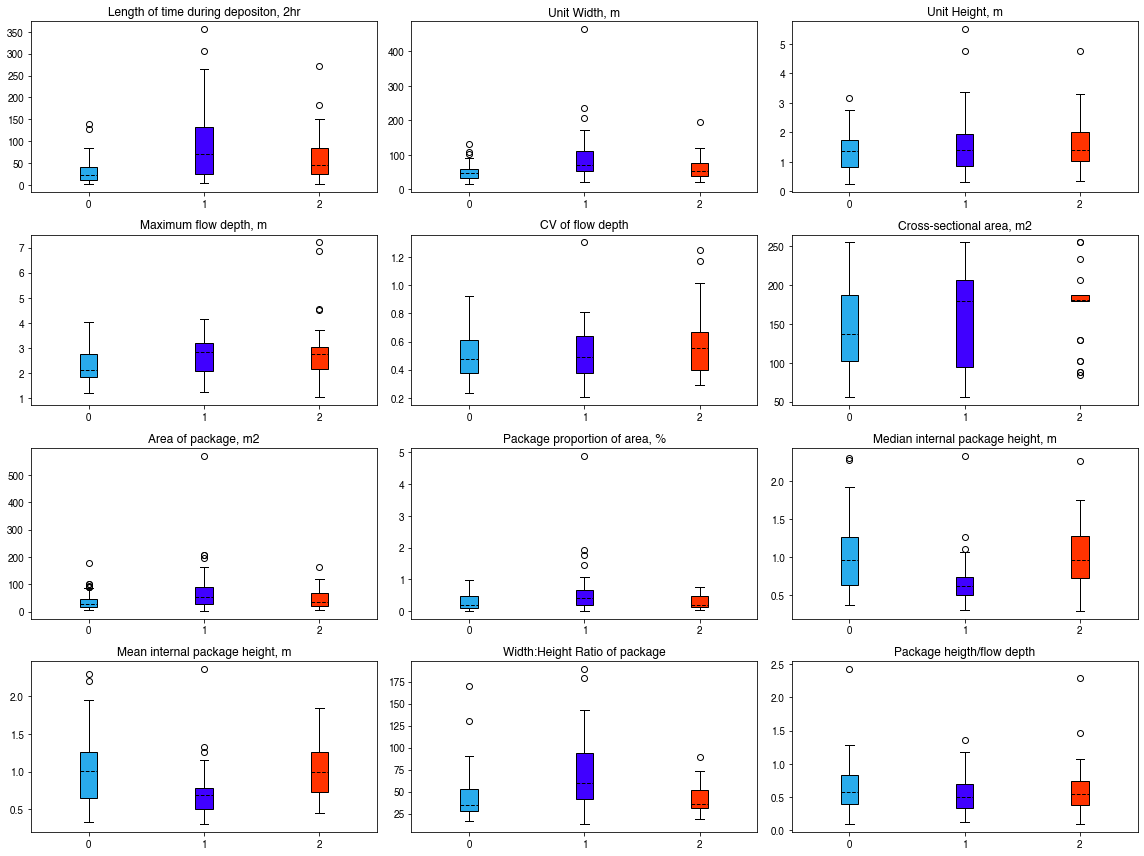

In [56]:
fig, ax = plt.subplots(4, 3, figsize = (16, 12), tight_layout = True)
ax = ax.ravel()
medianprops = dict(linestyle='--', linewidth=1, color='k')
boxprops = dict(linestyle='--', linewidth=1, color='black')
for idx, var in enumerate(corevar_list):
    bplotla = ax[idx].boxplot(var.iloc[:lalen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops)
    bplotdef = ax[idx].boxplot(var.iloc[:deflen, 1], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops)
    bplotsm = ax[idx].boxplot(var.iloc[:smlen, 2], patch_artist = True, positions = [2], boxprops=boxprops, medianprops=medianprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[idx].set_title(corevar_nmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    

# plt.savefig('testforai.pdf')

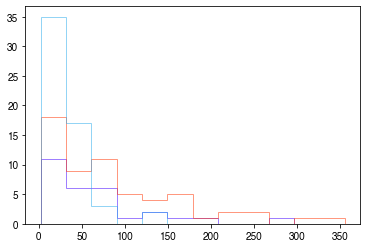

In [57]:
plt.hist(elapsed_time, color = colours, histtype = 'step', alpha = 0.5, bins = 12);

Text(0.5, 0, 'Elapsed time, 2hr')

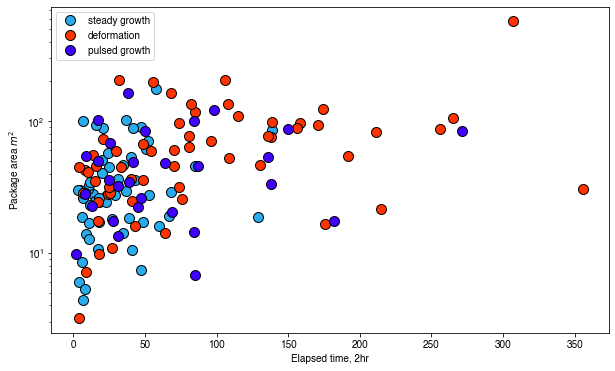

In [60]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:lalen, 0], package_area.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:deflen, 1], package_area.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:smlen, 2], package_area.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area $m^2$')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Elapsed time, 2hr')

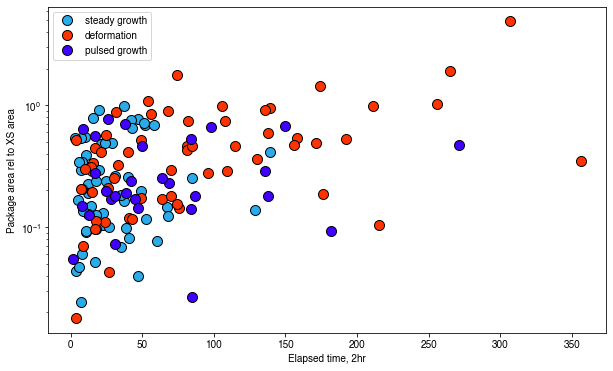

In [61]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:lalen, 0], perc_area.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:deflen, 1], perc_area.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:smlen, 2], perc_area.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area rel to XS area')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Package Width, m')

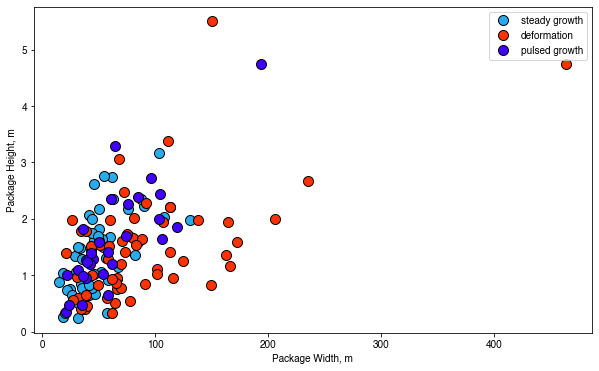

In [62]:
plt.figure(figsize = (10, 6))
plt.plot(packagewidth.iloc[:lalen, 0], package_height.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:deflen, 1], package_height.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:smlen, 2], package_height.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package Height, m')
plt.xlabel('Package Width, m')

Text(0, 0.5, 'Frequency')

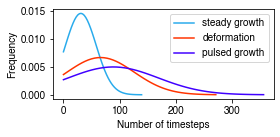

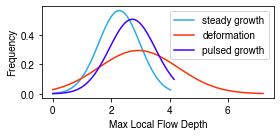

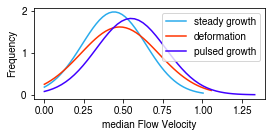

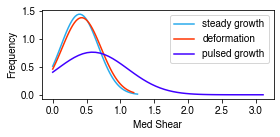

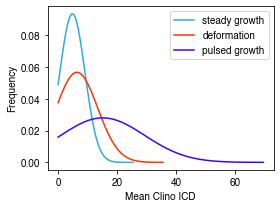

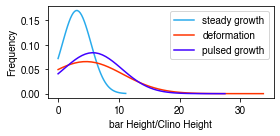

In [102]:
labels = ['steady growth', 'deformation', 'pulsed growth']

plt.figure(figsize = (4, 2), tight_layout = True)
for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['ElapsedTime'])
    scale = np.std(var['ElapsedTime'])

    x = np.linspace(0, (var['ElapsedTime']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Number of timesteps')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)
plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MaxFlowDepth'])
    scale = np.std(var['MaxFlowDepth'])

    x = np.linspace(0, (var['MaxFlowDepth']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Max Local Flow Depth')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)
ax = plt.gca()
for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MedVelocity'])
    scale = np.std(var['MedVelocity'])

    x = np.linspace(0, (var['MedVelocity']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    ax.plot(x, y, label = labels[i], c = colours[i])
    
plt.legend()
plt.xlabel('median Flow Velocity')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MedShear'])
    scale = np.std(var['MedShear'])

    x = np.linspace(0, (var['MedShear']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Med Shear')
plt.ylabel('Frequency')

plt.figure(figsize = (4,3), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MeanClinoICD'])
    scale = np.std(var['MeanClinoICD'])

    x = np.linspace(0, (var['MeanClinoICD']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])

plt.legend()
plt.xlabel('Mean Clino ICD')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['BarHeight']/var['ModeClinoHt'])
    scale = np.std(var['BarHeight']/var['ModeClinoHt'])

    x = np.linspace(0, (var['BarHeight']/var['ModeClinoHt']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('bar Height/Clino Height')
plt.ylabel('Frequency')

In [70]:
# sections = np.unique(allbars['iloc'])
# sectiondist = np.empty([len(sections), 3])
# for i, iloc in enumerate(sections):
#     inthere = allbars['pkg_type'][allbars['iloc']==iloc] ##find the facies in each section
#     ## count the number of each facies
#     sectiondist[i, 1] = np.sum(inthere.str.count("DEF"))
#     sectiondist[i, 2] = np.sum(inthere.str.count("SM"))
#     sectiondist[i, 0] = np.sum(inthere.str.count("LA"))

sectiondist = [lalen, deflen, smlen]

In [72]:
# plt.figure(figsize = (20, 6))
# plt.xlim(0, 10000)
# w=100
# for i in range(0, len(sectiondist)):
#     plt.bar(sections[i]*10, sectiondist[i, 0], w, color=colours[0], ec = 'k')
# for x in range (0, len(sections)):
#     for i in [1, 2]:
#         #fac = plt.bar(x, xs_freq[i, x], w, bottom = np.sum(xs_freq[:i, x]), color = clist[i])
#         plt.bar(sections[x]*10, sectiondist[x, i], w, bottom = np.sum(sectiondist[x, :i]), color = colours[i], ec = 'k')
# ax=plt.gca()
# # 

## Cluster 1--Geometric relationships

/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_60055/3082086758.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax[2].legend([5, 6], labels = ['Median', 'Mode'])


(0.0, 1.0)

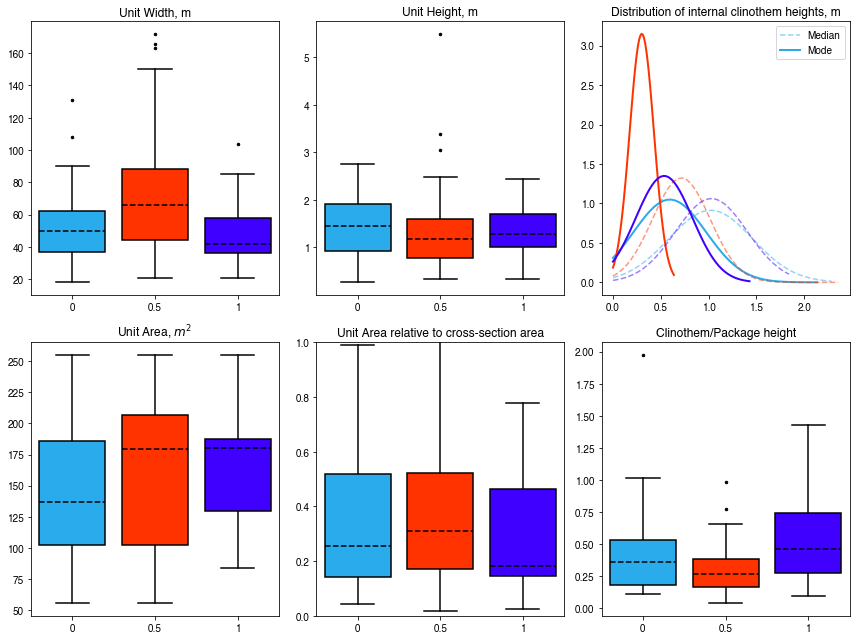

In [104]:
fig, ax = plt.subplots(2, 3, figsize = (12, 9), tight_layout = True, sharex = False, squeeze = True)

ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = [0, 1, 3, 4, -1]
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')
for a in bplotaxes:
    ax[a].set_xlim(-0.25, 1.25)
vlist = [packagewidth, package_height, xsarea, perc_area, pkg_modeht]
vnmlist = ['Unit Width, m', 'Unit Height, m', 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:39, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:45, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:21, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
for i, var in enumerate([LA, DEF, SM]):
    locme = np.nanmean(var['MeanClinoHt']) #mean
    scaleme = np.std(var['MeanClinoHt'])
    
    locmo = np.nanmean(var['ModeClinoHt']) #mode
    scalemo = np.std(var['ModeClinoHt'])
    
    locmd = np.nanmean(var['MedClinoHt']) #median
    scalemd = np.std(var['MedClinoHt'])

    xme = np.linspace(0, var['MeanClinoHt'].max())
    yme = stats.norm.pdf(xme, locme, scaleme)
    xmo = np.linspace(0, var['ModeClinoHt'].max())
    ymo = stats.norm.pdf(xmo, locmo, scalemo)
    xmd = np.linspace(0, var['MedClinoHt'].max())
    ymd = stats.norm.pdf(xmd, locmd, scalemd)
    
    ax[2].set_title('Distribution of internal clinothem heights, m')
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    me = ax[2].plot(xme, yme, label = labels[i], c = colours[i], ls = '--', alpha = 0.5)
    mo = ax[2].plot(xmo, ymo, c = colours[i], ls = '-', lw = 2)
    #md = ax[2].plot(xmd, ymd, c = colours[i], ls = '-.', alpha = 0.5)
#    x.boxplot([values_cg, values_eg], widths=1)
ax[2].legend([5, 6], labels = ['Median', 'Mode'])
ax[4].set_ylim(0, 1)
# plt.savefig(f'{savefilesto}clus1-boxplots.png', dpi = 300)

#### Cluster 2--relative to flow

Text(0.5, 0, 'Length of depositon, T')

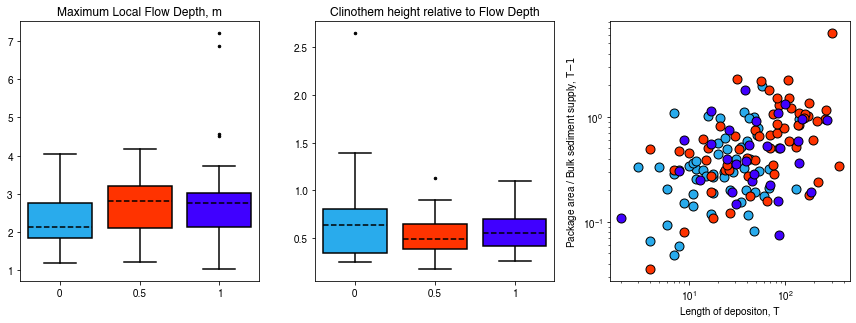

In [78]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4.6), tight_layout = True, squeeze = True)
ax[0].set_xlim(-0.25, 1.25)
ax[1].set_xlim(-0.25,1.25)
ax = ax.ravel()
bplotaxes = [0, 1]
vlist = [depth, bh_flowdep]
vnmlist = ['Maximum Local Flow Depth, m', 'Clinothem height relative to Flow Depth']# 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:lalen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:deflen, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:smlen, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
ax[2].loglog(elapsed_time.iloc[:lalen, 0], pkg_qs.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:deflen, 1], pkg_qs.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'reworking', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:smlen, 2], pkg_qs.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 9)
ax[2].set_ylabel('Package area / Bulk sediment supply, T$-1$')
ax[2].set_xlabel('Length of depositon, T')
# plt.savefig(f'{savefilesto}clus2-boxplots.png', dpi = 200)

In [79]:
crosatom = ((0.17*9.81)*(-7*(50**3)*-0.00137)/(((1.7*0.00031)**0.5)*(((2**(1/6))/0.12)*100)))**0.5
print(crosatom) ##check this

9.648846795342303


In [32]:

# labels = ['steady growth', 'pulsed growth', 'deformation']
# percent_abundance_true = (np.sum(sectiondist, axis = 0)/(39+45+21))*100
# for_m_1 = [45, 35, 20] ##meandering planform
# for_m_10 = [20, 65, 15]
# fig, ax = plt.subplots(1, 3, figsize = (10, 5), tight_layout = True)

# braidedpie = ax[0].pie(percent_abundance_true, labels = labels, colors = colours);
# with plt.xkcd():
#     meanderpie = ax[1].pie(for_m_1, labels = labels, colors = colours)
# #    braidpie = ax[2].bar(labels, for_m_10, labels = labels, colors = colours)


## For planform change

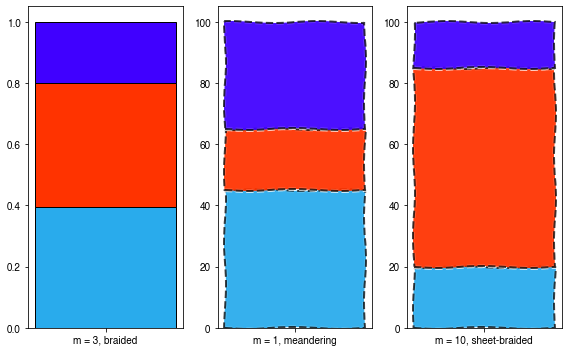

In [86]:
labels = ['m = 3, braided', 'm = 1, meandering', 'm = 10, sheet-braided']
matrix = np.array(
        [[lalen/np.sum(sectiondist), 45, 20],
         [deflen/np.sum(sectiondist), 20, 65],
         [smlen/np.sum(sectiondist), 35, 15]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k', alpha = .75, lw = 2, ls = '--')
    
    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    
# plt.savefig(f'{savefilesto}schema-m.png', dpi = 200)    

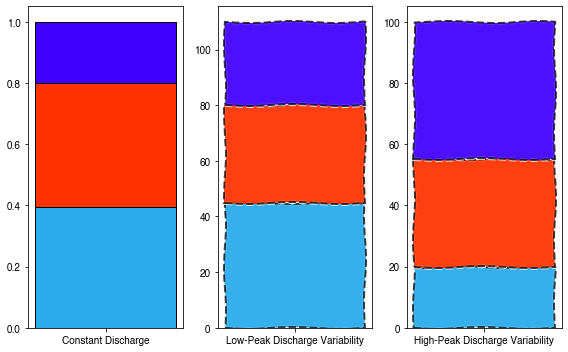

In [87]:
labels = ['Constant Discharge', 'Low-Peak Discharge Variability', 'High-Peak Discharge Variability']
matrix = np.array([[lalen/np.sum(sectiondist), 45, 20],
         [deflen/np.sum(sectiondist), 35, 35],
         [smlen/np.sum(sectiondist), 30, 45]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k', alpha = .75, lw = 2, ls = '--')
    
    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    
# plt.savefig(f'{savefilesto}schema-dv.png', dpi = 200)